In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.psd.analytical_space import *
import pycbc.noise
from pycbc.waveform import get_fd_det_waveform, get_td_det_waveform_from_fd_det
from pycbc.coordinates import TIME_OFFSET_20_DEGREES, lisa_to_ssb
from pycbc.filter.matchedfilter import sigma

# 1. Let's use PyCBC to generate TDI-1.5/2.0 PSDs for LISA, Taiji, and TianQin.

/home/anaconda3/envs/bbhx_env/lib/python3.9/site-packages/pycbc/psd/read.py:73: RuntimeWarning: divide by zero encountered in log
  slog = numpy.log(noise_data)
/home/anaconda3/envs/bbhx_env/lib/python3.9/site-packages/pycbc/psd/analytical_space.py:1419: RuntimeWarning: overflow encountered in exp
  sh_confusion = np.exp(


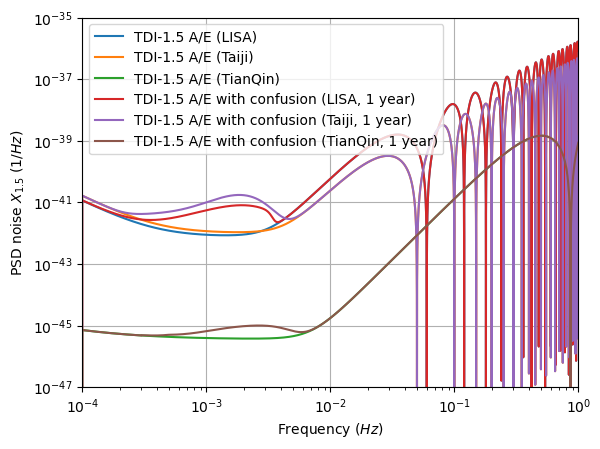

In [2]:
flow = 1e-4
delta_f = 1.0 / (3600*24*31)
fs = 2
flen = int(fs/delta_f)//2 + 1

psd_tdi_1p5_lisa_A = analytical_psd_lisa_tdi_AE(flen, delta_f, flow,
                len_arm=2.5e9, acc_noise_level=3e-15, oms_noise_level=15e-12, tdi='1.5')
psd_tdi_1p5_taiji_A = analytical_psd_taiji_tdi_AE(flen, delta_f, flow,
                len_arm=3e9, acc_noise_level=3e-15, oms_noise_level=8e-12, tdi='1.5')
psd_tdi_1p5_tianqin_A = analytical_psd_tianqin_tdi_AE(flen, delta_f, flow,
                len_arm=np.sqrt(3)*1e8, acc_noise_level=1e-15, oms_noise_level=1e-12, tdi='1.5')
psd_tdi_1p5_lisa_A_confusion_1 = analytical_psd_lisa_tdi_AE_confusion(flen, delta_f, flow,
                len_arm=2.5e9, acc_noise_level=3e-15, oms_noise_level=15e-12, duration=1.0, tdi="1.5")
psd_tdi_1p5_taiji_A_confusion_1 = analytical_psd_taiji_tdi_AE_confusion(flen, delta_f, flow,
                len_arm=3e9, acc_noise_level=3e-15, oms_noise_level=8e-12, duration=1.0, tdi="1.5")
psd_tdi_1p5_tianqin_A_confusion_1 = analytical_psd_tianqin_tdi_AE_confusion(flen, delta_f, flow,
                len_arm=np.sqrt(3)*1e8, acc_noise_level=1e-15, oms_noise_level=1e-12, duration=1.0, tdi="1.5")

plt.loglog(psd_tdi_1p5_lisa_A.sample_frequencies, psd_tdi_1p5_lisa_A, label='TDI-1.5 A/E (LISA)')
plt.loglog(psd_tdi_1p5_taiji_A.sample_frequencies, psd_tdi_1p5_taiji_A, label='TDI-1.5 A/E (Taiji)')
plt.loglog(psd_tdi_1p5_tianqin_A.sample_frequencies, psd_tdi_1p5_tianqin_A, label='TDI-1.5 A/E (TianQin)')

plt.loglog(psd_tdi_1p5_lisa_A_confusion_1.sample_frequencies, psd_tdi_1p5_lisa_A_confusion_1,
           label='TDI-1.5 A/E with confusion (LISA, 1 year)')
plt.loglog(psd_tdi_1p5_taiji_A_confusion_1.sample_frequencies, psd_tdi_1p5_taiji_A_confusion_1,
           label='TDI-1.5 A/E with confusion (Taiji, 1 year)')
plt.loglog(psd_tdi_1p5_tianqin_A_confusion_1.sample_frequencies, psd_tdi_1p5_tianqin_A_confusion_1,
           label='TDI-1.5 A/E with confusion (TianQin, 1 year)')

plt.xlabel(r'Frequency ($Hz$)')
plt.ylabel(r'PSD noise $X_{1.5}$ ($1/{Hz}$)')
plt.xlim([1e-4, 1])
plt.ylim([1e-47, 1e-35])
plt.legend(loc="upper left")
plt.grid()
plt.show()

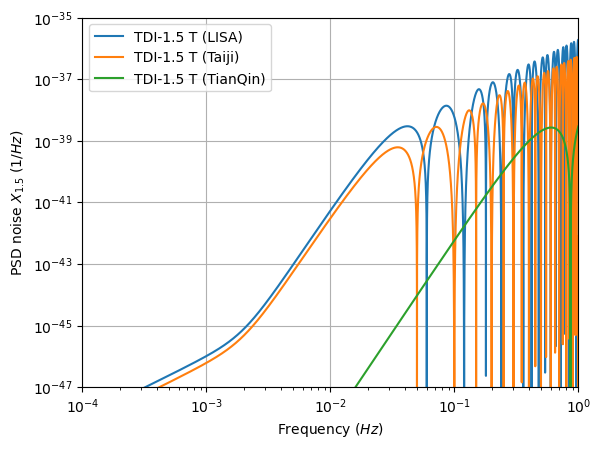

In [3]:
psd_tdi_1p5_lisa_T = analytical_psd_lisa_tdi_T(flen, delta_f, flow,
                len_arm=2.5e9, acc_noise_level=3e-15, oms_noise_level=15e-12, tdi='1.5')
psd_tdi_1p5_taiji_T = analytical_psd_taiji_tdi_T(flen, delta_f, flow,
                len_arm=3e9, acc_noise_level=3e-15, oms_noise_level=8e-12, tdi='1.5')
psd_tdi_1p5_tianqin_T = analytical_psd_tianqin_tdi_T(flen, delta_f, flow,
                len_arm=np.sqrt(3)*1e8, acc_noise_level=1e-15, oms_noise_level=1e-12, tdi='1.5')

plt.loglog(psd_tdi_1p5_lisa_T.sample_frequencies, psd_tdi_1p5_lisa_T, label='TDI-1.5 T (LISA)')
plt.loglog(psd_tdi_1p5_taiji_T.sample_frequencies, psd_tdi_1p5_taiji_T, label='TDI-1.5 T (Taiji)')
plt.loglog(psd_tdi_1p5_tianqin_T.sample_frequencies, psd_tdi_1p5_tianqin_T, label='TDI-1.5 T (TianQin)')

plt.xlabel(r'Frequency ($Hz$)')
plt.ylabel(r'PSD noise $X_{1.5}$ ($1/{Hz}$)')
plt.xlim([1e-4, 1])
plt.ylim([1e-47, 1e-35])
plt.legend(loc="upper left")
plt.grid()
plt.show()

# 2. Let's use PyCBC to generate time-domain noise for LISA.

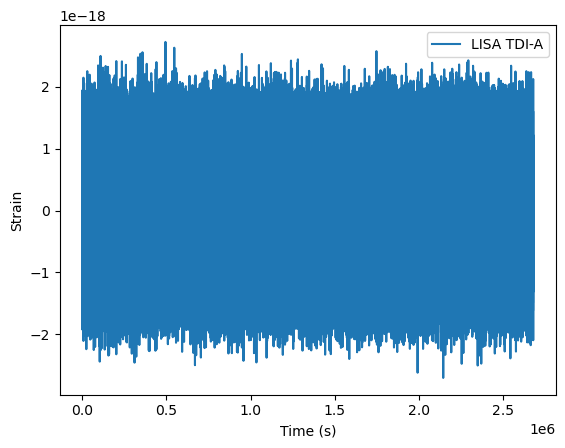

In [4]:
delta_t = 1.0 / fs
tsamples = int(3600*24*31 / delta_t)
ts_A = pycbc.noise.noise_from_psd(tsamples, delta_t, psd_tdi_1p5_lisa_A, seed=127)

plt.plot(ts_A.sample_times, ts_A, label='LISA TDI-A')
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

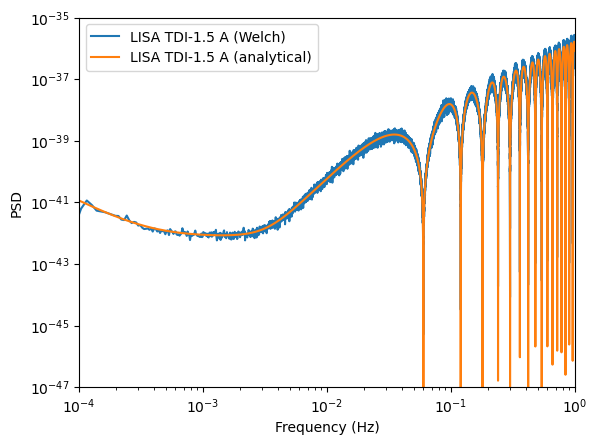

In [7]:
psd_A_welch = ts_A.psd(3600*24*1)
plt.loglog(psd_A_welch.sample_frequencies, psd_A_welch, label="LISA TDI-1.5 A (Welch)")
plt.loglog(psd_tdi_1p5_lisa_A.sample_frequencies, psd_tdi_1p5_lisa_A, label="LISA TDI-1.5 A (analytical)")
plt.xlim(1e-4, 1)
plt.ylim([1e-47, 1e-35])
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.legend()
plt.show()

# 3. Let's use PyCBC to generate frequency/time-domain SMBHB sigals for LISA.

In [8]:
# set parameters
params = {}
params['ref_frame'] = 'LISA'
params['approximant'] = 'BBHX_PhenomD'
params['coa_phase'] = 0.0
params['mass1'] = 1e6
params['mass2'] = 5e5
params['spin1z'] = 0.0
params['spin2z'] = 0.0
params['distance'] = 410
params['inclination'] = 0.0
params['eclipticlongitude'] = 5.4
params['eclipticlatitude'] = 0
params['polarization'] = 0.0
params['tc'] = 1273970818
params['t_obs_start'] = 31558149.763545603
params['f_lower'] = 1e-4
params['f_ref'] = 1e-4
params['f_final'] = 0.1
params['delta_t'] = 1/0.2
params['delta_f'] = 1/params['t_obs_start']
params['t_offset'] = TIME_OFFSET_20_DEGREES

In [9]:
# generate frequency-domain TDI waveform
bbhx_fd_tdi_1p5 = get_fd_det_waveform(ifos=['LISA_A','LISA_E','LISA_T'], tdi='1.5', **params)
bbhx_fd_tdi_2p0 = get_fd_det_waveform(ifos=['LISA_A','LISA_E','LISA_T'], tdi='2.0', **params)

# generate time-domain TDI waveform
bbhx_td_tdi_1p5 = get_td_det_waveform_from_fd_det(ifos=['LISA_A','LISA_E','LISA_T'], tdi='1.5', **params)

params:  {'mass1': 1000000.0, 'mass2': 500000.0, 'spin1x': 0.0, 'spin1y': 0.0, 'spin1z': 0.0, 'spin2x': 0.0, 'spin2y': 0.0, 'spin2z': 0.0, 'eccentricity': 0.0, 'lambda1': None, 'lambda2': None, 'dquad_mon1': None, 'dquad_mon2': None, 'lambda_octu1': None, 'lambda_octu2': None, 'quadfmode1': None, 'quadfmode2': None, 'octufmode1': None, 'octufmode2': None, 'dchi0': 0.0, 'dchi1': 0.0, 'dchi2': 0.0, 'dchi3': 0.0, 'dchi4': 0.0, 'dchi5': 0.0, 'dchi5l': 0.0, 'dchi6': 0.0, 'dchi6l': 0.0, 'dchi7': 0.0, 'dalpha1': 0.0, 'dalpha2': 0.0, 'dalpha3': 0.0, 'dalpha4': 0.0, 'dalpha5': 0.0, 'dbeta1': 0.0, 'dbeta2': 0.0, 'dbeta3': 0.0, 'distance': 410, 'coa_phase': 0.0, 'inclination': 0.0, 'long_asc_nodes': 0.0, 'mean_per_ano': 0.0, 'delta_f': 3.1687535786877785e-08, 'f_lower': 0.0001, 'approximant': 'BBHX_PhenomD', 'f_ref': 0.0001, 'phase_order': -1, 'spin_order': -1, 'tidal_order': -1, 'amplitude_order': -1, 'eccentricity_order': -1, 'frame_axis': 0, 'modes_choice': 0, 'side_bands': 0, 'mode_array': No

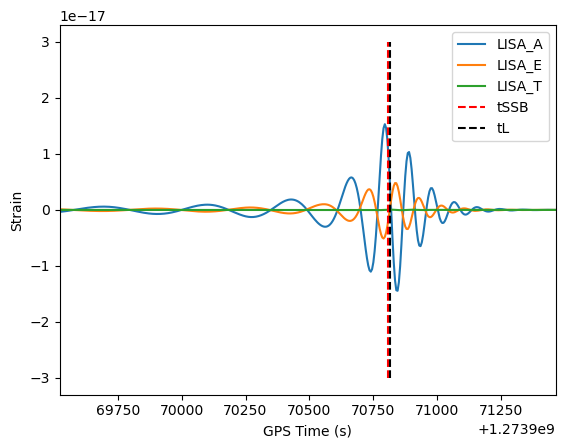

In [10]:
# get the merge time in SSB frame as a comparison
tSSB, _, _, _ = lisa_to_ssb(params['tc'], params['eclipticlongitude'], 
                            params['eclipticlatitude'], params['polarization'],
                            params['t_offset'])

plt.plot(bbhx_td_tdi_1p5['LISA_A'].sample_times, bbhx_td_tdi_1p5['LISA_A'], label='TDI-1.5 A')
plt.plot(bbhx_td_tdi_1p5['LISA_E'].sample_times, bbhx_td_tdi_1p5['LISA_E'], label='TDI-1.5 A')
plt.plot(bbhx_td_tdi_1p5['LISA_T'].sample_times, bbhx_td_tdi_1p5['LISA_T'], label='TDI-1.5 A')

plt.vlines(x=tSSB, ymin=-3e-17, ymax=3e-17, colors='red', linestyles='dashed', label='tSSB')
plt.vlines(x=params['tc'], ymin=-3e-17, ymax=3e-17, colors='k', linestyles='dashed', label='tL')
plt.xlim(params['tc']-1296, params['tc']+648)
plt.xlabel("GPS Time (s)")
plt.ylabel("Strain")
plt.legend()
plt.show()

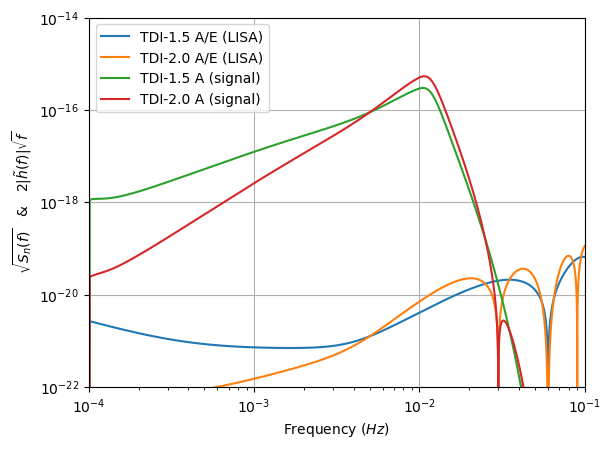

In [12]:
psd_tdi_1p5_lisa_A = analytical_psd_lisa_tdi_AE(flen, delta_f, flow,
                len_arm=2.5e9, acc_noise_level=2.4e-15, oms_noise_level=7.9e-12, tdi='1.5')
psd_tdi_2p0_lisa_A = analytical_psd_lisa_tdi_AE(flen, delta_f, flow,
                len_arm=2.5e9, acc_noise_level=2.4e-15, oms_noise_level=7.9e-12, tdi='2.0')
plt.loglog(psd_tdi_1p5_lisa_A.sample_frequencies, np.sqrt(psd_tdi_1p5_lisa_A), label='TDI-1.5 A/E (LISA)')
plt.loglog(psd_tdi_2p0_lisa_A.sample_frequencies, np.sqrt(psd_tdi_2p0_lisa_A), label='TDI-2.0 A/E (LISA)')

plt.loglog(bbhx_fd_tdi_1p5['LISA_A'].sample_frequencies, 2*np.abs(bbhx_fd_tdi_1p5['LISA_A'])*np.sqrt(bbhx_fd_tdi_1p5['LISA_A'].sample_frequencies), label='TDI-1.5 A (signal)')
plt.loglog(bbhx_fd_tdi_2p0['LISA_A'].sample_frequencies, 2*np.abs(bbhx_fd_tdi_2p0['LISA_A'])*np.sqrt(bbhx_fd_tdi_2p0['LISA_A'].sample_frequencies), label='TDI-2.0 A (signal)')

plt.xlabel(r'Frequency ($Hz$)')
plt.ylabel(r'$\sqrt{S_{n}(f)} \quad & \quad 2|\tilde{h}(f)| \sqrt{f}$')
plt.xlim([1e-4, 0.1])
plt.ylim([1e-22, 1e-14])
plt.legend(loc="upper left")
plt.grid()
plt.show()

# 4. Let's check the optimal SNR for those TDI-1.5/2.0 signals.

In [14]:
def optimal_snr_lisa(params, tdi='1.5'):
    # Simply set it according to Tobs_LISA, not the duration of signal.
    delta_f = params['delta_f']
    fs = 2 * params['f_final']
    flen = int(fs/delta_f)//2 + 1
    flow = params['f_lower']
    if isinstance(params['t_offset'], str):
        params['t_offset'] = TIME_OFFSET_20_DEGREES

    bbhx_fd = get_fd_det_waveform(ifos=['LISA_A','LISA_E','LISA_T'], tdi=tdi, **params)
    strain_list = list(bbhx_fd.keys())

    psd_tdi_A_E = analytical_psd_lisa_tdi_AE(flen, delta_f, flow,
                        len_arm=2.5e9, acc_noise_level=2.4e-15, oms_noise_level=7.9e-12,
                        tdi=tdi)
    psd_tdi_T = analytical_psd_lisa_tdi_T(flen, delta_f, flow, 
                        len_arm=2.5e9, acc_noise_level=2.4e-15, oms_noise_level=7.9e-12, tdi=tdi)
    psd_list = [psd_tdi_A_E, psd_tdi_A_E, psd_tdi_T]

    snr_opt = 0
    for i in range(3):
        snr_opt += sigma(htilde=bbhx_fd[strain_list[i]], psd=psd_list[i],
                         low_frequency_cutoff=flow, high_frequency_cutoff=fs/2)**2

    return np.sqrt(snr_opt)

In [15]:
optimal_snr_lisa(params, tdi='1.5')

params:  {'mass1': 1000000.0, 'mass2': 500000.0, 'spin1x': 0.0, 'spin1y': 0.0, 'spin1z': 0.0, 'spin2x': 0.0, 'spin2y': 0.0, 'spin2z': 0.0, 'eccentricity': 0.0, 'lambda1': None, 'lambda2': None, 'dquad_mon1': None, 'dquad_mon2': None, 'lambda_octu1': None, 'lambda_octu2': None, 'quadfmode1': None, 'quadfmode2': None, 'octufmode1': None, 'octufmode2': None, 'dchi0': 0.0, 'dchi1': 0.0, 'dchi2': 0.0, 'dchi3': 0.0, 'dchi4': 0.0, 'dchi5': 0.0, 'dchi5l': 0.0, 'dchi6': 0.0, 'dchi6l': 0.0, 'dchi7': 0.0, 'dalpha1': 0.0, 'dalpha2': 0.0, 'dalpha3': 0.0, 'dalpha4': 0.0, 'dalpha5': 0.0, 'dbeta1': 0.0, 'dbeta2': 0.0, 'dbeta3': 0.0, 'distance': 410, 'coa_phase': 0.0, 'inclination': 0.0, 'long_asc_nodes': 0.0, 'mean_per_ano': 0.0, 'delta_f': 3.1687535786877785e-08, 'f_lower': 0.0001, 'approximant': 'BBHX_PhenomD', 'f_ref': 0.0001, 'phase_order': -1, 'spin_order': -1, 'tidal_order': -1, 'amplitude_order': -1, 'eccentricity_order': -1, 'frame_axis': 0, 'modes_choice': 0, 'side_bands': 0, 'mode_array': No

95257.80333946974

In [16]:
optimal_snr_lisa(params, tdi='2.0')

params:  {'mass1': 1000000.0, 'mass2': 500000.0, 'spin1x': 0.0, 'spin1y': 0.0, 'spin1z': 0.0, 'spin2x': 0.0, 'spin2y': 0.0, 'spin2z': 0.0, 'eccentricity': 0.0, 'lambda1': None, 'lambda2': None, 'dquad_mon1': None, 'dquad_mon2': None, 'lambda_octu1': None, 'lambda_octu2': None, 'quadfmode1': None, 'quadfmode2': None, 'octufmode1': None, 'octufmode2': None, 'dchi0': 0.0, 'dchi1': 0.0, 'dchi2': 0.0, 'dchi3': 0.0, 'dchi4': 0.0, 'dchi5': 0.0, 'dchi5l': 0.0, 'dchi6': 0.0, 'dchi6l': 0.0, 'dchi7': 0.0, 'dalpha1': 0.0, 'dalpha2': 0.0, 'dalpha3': 0.0, 'dalpha4': 0.0, 'dalpha5': 0.0, 'dbeta1': 0.0, 'dbeta2': 0.0, 'dbeta3': 0.0, 'distance': 410, 'coa_phase': 0.0, 'inclination': 0.0, 'long_asc_nodes': 0.0, 'mean_per_ano': 0.0, 'delta_f': 3.1687535786877785e-08, 'f_lower': 0.0001, 'approximant': 'BBHX_PhenomD', 'f_ref': 0.0001, 'phase_order': -1, 'spin_order': -1, 'tidal_order': -1, 'amplitude_order': -1, 'eccentricity_order': -1, 'frame_axis': 0, 'modes_choice': 0, 'side_bands': 0, 'mode_array': No

95257.80333971855